In [23]:
import pandas as pd

input_path = 'dataset/cleaned_train.csv'
input_csv = pd.read_csv(input_path)

train = input_csv.drop(columns='sii')
y = input_csv['sii']

train.shape, y.shape

((1491, 27), (1491,))

# kNN

### priova numero 1 proviamo il kNN per valori di k tra 1 e 100 senza nessun tipo di scalabilità dei dati in input

In [24]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [25]:
lower_bound = 1
upper_bound = 100
region = range(lower_bound, upper_bound)
graph_accuaracies = []
graph_scores = []

In [26]:
import matplotlib.pyplot as plt
def print_analysis():
    plt.figure(figsize=(12, 6))
    plt.plot(region, graph_accuaracies, label='Test Accuracy', marker='o')
    plt.plot(region, graph_scores, label='Cross-Validation Score', marker='x')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Score')
    plt.title('Accuracy and Cross-Validation Score vs. k')
    plt.legend()
    plt.grid()
    plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.25, random_state=42)

graph_accuaracies = []
graph_scores      = []

for k in region: # try k from 1 to 100

    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train, y_train )
    y_pred = kNN.predict( X_test )

    # compute Accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    graph_accuaracies.append(acc)
    scr = cross_val_score(kNN, train, y, cv=4).mean()
    graph_scores.append(scr)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc), " | Cross validation score {:.3f}".format(scr))

k:  1 | Accuracy 0.512  | Cross validation score 0.510
k:  2 | Accuracy 0.574  | Cross validation score 0.587
k:  3 | Accuracy 0.552  | Cross validation score 0.577
k:  4 | Accuracy 0.606  | Cross validation score 0.590
k:  5 | Accuracy 0.603  | Cross validation score 0.592
k:  6 | Accuracy 0.627  | Cross validation score 0.604
k:  7 | Accuracy 0.614  | Cross validation score 0.595
k:  8 | Accuracy 0.630  | Cross validation score 0.612
k:  9 | Accuracy 0.633  | Cross validation score 0.601
k: 10 | Accuracy 0.611  | Cross validation score 0.606
k: 11 | Accuracy 0.619  | Cross validation score 0.600
k: 12 | Accuracy 0.614  | Cross validation score 0.604
k: 13 | Accuracy 0.611  | Cross validation score 0.604
k: 14 | Accuracy 0.603  | Cross validation score 0.604
k: 15 | Accuracy 0.609  | Cross validation score 0.602
k: 16 | Accuracy 0.603  | Cross validation score 0.608
k: 17 | Accuracy 0.603  | Cross validation score 0.604
k: 18 | Accuracy 0.609  | Cross validation score 0.604
k: 19 | Ac

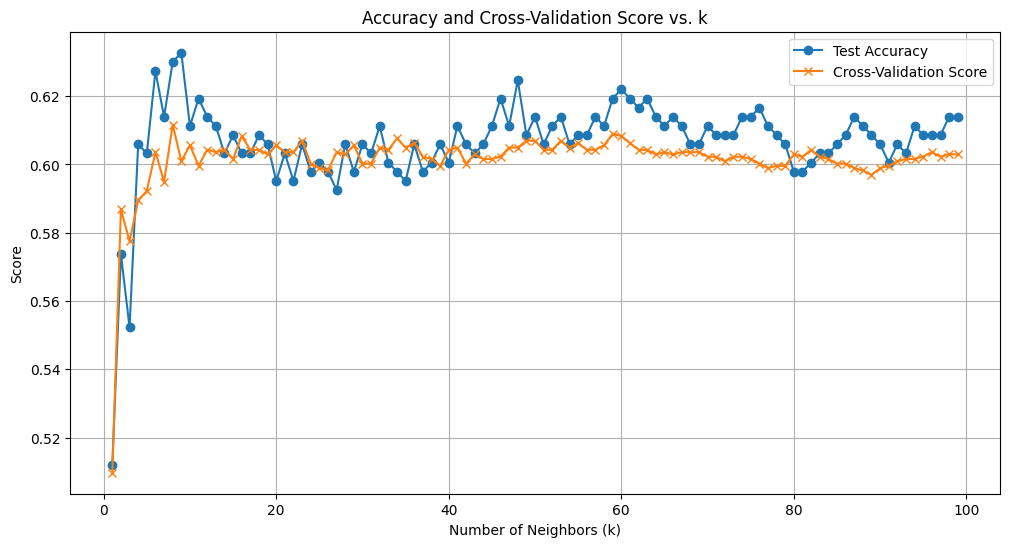

In [28]:
print_analysis()

In [29]:
#for f in train.columns:
    #print ("Feature {:} -> Scale: {:7.2f}".format(f, train.loc[:,f].max() - train.loc[:,f].min()) )

Now I'm gonna try with two different scales

In [30]:
#MinMaxScaler:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.25, random_state=42)

graph_accuaracies = []
graph_scores      = []

scaler = MinMaxScaler()


X_train_MinMax_scaled = scaler.fit_transform(X_train)
X_test_MinMax_scaled = scaler.transform(X_test)

for k in region:
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train_MinMax_scaled, y_train)
    y_pred = kNN.predict(X_test_MinMax_scaled)

    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    graph_accuaracies.append(acc)
    scr = cross_val_score(kNN, train, y, cv=4).mean()
    graph_scores.append(scr)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc), " | Cross validation score {:.3f}".format(scr))

k:  1 | Accuracy 0.544  | Cross validation score 0.510
k:  2 | Accuracy 0.587  | Cross validation score 0.587
k:  3 | Accuracy 0.576  | Cross validation score 0.577
k:  4 | Accuracy 0.601  | Cross validation score 0.590
k:  5 | Accuracy 0.574  | Cross validation score 0.592
k:  6 | Accuracy 0.595  | Cross validation score 0.604
k:  7 | Accuracy 0.587  | Cross validation score 0.595
k:  8 | Accuracy 0.601  | Cross validation score 0.612
k:  9 | Accuracy 0.619  | Cross validation score 0.601
k: 10 | Accuracy 0.614  | Cross validation score 0.606
k: 11 | Accuracy 0.609  | Cross validation score 0.600
k: 12 | Accuracy 0.611  | Cross validation score 0.604
k: 13 | Accuracy 0.609  | Cross validation score 0.604
k: 14 | Accuracy 0.622  | Cross validation score 0.604
k: 15 | Accuracy 0.625  | Cross validation score 0.602
k: 16 | Accuracy 0.630  | Cross validation score 0.608
k: 17 | Accuracy 0.622  | Cross validation score 0.604
k: 18 | Accuracy 0.625  | Cross validation score 0.604
k: 19 | Ac

Now I would like to plot the improvements of my model with the variation of k:

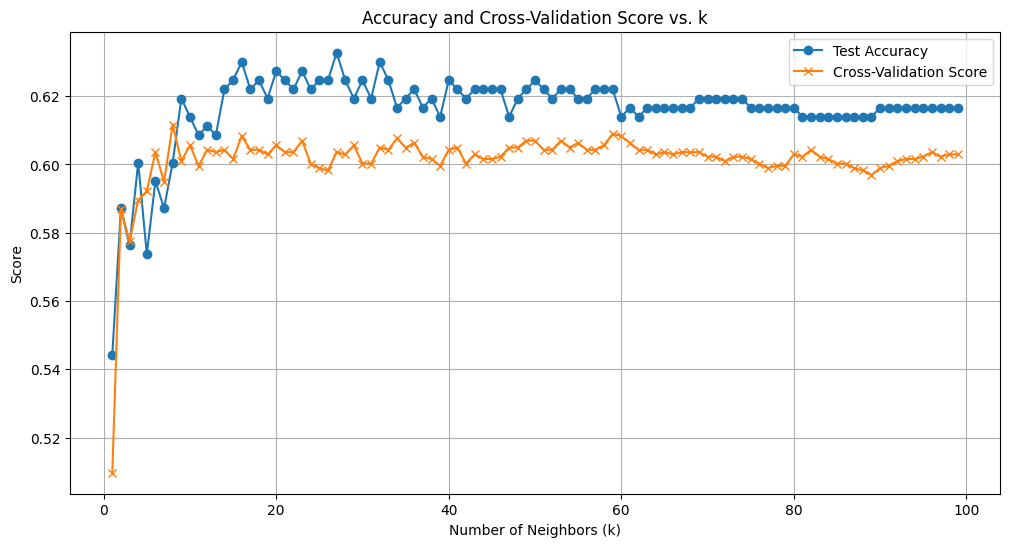

In [31]:
print_analysis()

In [32]:
#StandardScaler:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.25, random_state=42)

graph_accuaracies = []
graph_scores      = []

scaler = StandardScaler()

X_train_Std_scaled = scaler.fit_transform(X_train)
X_test_Std_scaled = scaler.transform(X_test)

for k in region:
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train_Std_scaled, y_train)
    y_pred = kNN.predict(X_test_Std_scaled)

    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    graph_accuaracies.append(acc)
    scr = cross_val_score(kNN, train, y, cv=4).mean()
    graph_scores.append(scr)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc), " | Cross validation score {:.3f}".format(scr))

k:  1 | Accuracy 0.542  | Cross validation score 0.510
k:  2 | Accuracy 0.603  | Cross validation score 0.587
k:  3 | Accuracy 0.592  | Cross validation score 0.577
k:  4 | Accuracy 0.617  | Cross validation score 0.590
k:  5 | Accuracy 0.614  | Cross validation score 0.592
k:  6 | Accuracy 0.622  | Cross validation score 0.604
k:  7 | Accuracy 0.622  | Cross validation score 0.595
k:  8 | Accuracy 0.617  | Cross validation score 0.612
k:  9 | Accuracy 0.622  | Cross validation score 0.601
k: 10 | Accuracy 0.633  | Cross validation score 0.606
k: 11 | Accuracy 0.627  | Cross validation score 0.600
k: 12 | Accuracy 0.614  | Cross validation score 0.604
k: 13 | Accuracy 0.606  | Cross validation score 0.604
k: 14 | Accuracy 0.609  | Cross validation score 0.604
k: 15 | Accuracy 0.611  | Cross validation score 0.602
k: 16 | Accuracy 0.611  | Cross validation score 0.608
k: 17 | Accuracy 0.609  | Cross validation score 0.604
k: 18 | Accuracy 0.611  | Cross validation score 0.604
k: 19 | Ac

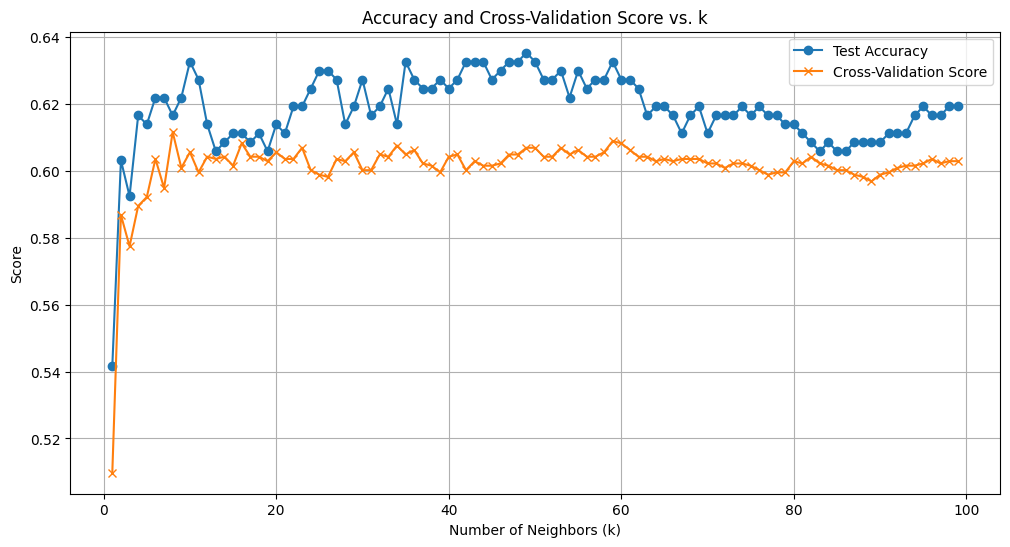

In [33]:
print_analysis()

Come possiamo vedere la gran parte dei miglioramenti sono ottenuti tra i 30 ed i 70 neighbours. Restringo quindi i miei bound

Mi estraggo la feature importance, le normalizzo e computo il classifier con le features pesate.
Provo poi ad utilizzare una custom distance basata sulla mia feature importance

In [34]:
lower_bound = 25
upper_bound = 75

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest to compute feature importance
rf = RandomForestClassifier(n_estimators=55, random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances
importances = rf.feature_importances_

# Normalize importance values to [0, 1]
normalized_importances = importances / importances.max()

In [36]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(train)
X_weigthed = X_scaled * normalized_importances

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_weigthed, y, test_size=0.25, random_state=42)

graph_accuaracies = []
graph_scores      = []

for k in range(lower_bound, upper_bound):
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train, y_train)
    y_pred = kNN.predict(X_test_Std_scaled)

    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    graph_accuaracies.append(acc)
    scr = cross_val_score(kNN, train, y, cv=4).mean()
    graph_scores.append(scr)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc), " | Cross validation score {:.3f}".format(scr))

k: 25 | Accuracy 0.625  | Cross validation score 0.599
k: 26 | Accuracy 0.622  | Cross validation score 0.598
k: 27 | Accuracy 0.633  | Cross validation score 0.604
k: 28 | Accuracy 0.641  | Cross validation score 0.603
k: 29 | Accuracy 0.633  | Cross validation score 0.606
k: 30 | Accuracy 0.635  | Cross validation score 0.600
k: 31 | Accuracy 0.635  | Cross validation score 0.600
k: 32 | Accuracy 0.630  | Cross validation score 0.605
k: 33 | Accuracy 0.633  | Cross validation score 0.604
k: 34 | Accuracy 0.627  | Cross validation score 0.608
k: 35 | Accuracy 0.638  | Cross validation score 0.605
k: 36 | Accuracy 0.643  | Cross validation score 0.606
k: 37 | Accuracy 0.641  | Cross validation score 0.602
k: 38 | Accuracy 0.641  | Cross validation score 0.602
k: 39 | Accuracy 0.649  | Cross validation score 0.600
k: 40 | Accuracy 0.651  | Cross validation score 0.604
k: 41 | Accuracy 0.646  | Cross validation score 0.605
k: 42 | Accuracy 0.641  | Cross validation score 0.600
k: 43 | Ac

Proviamo ora il secondo tentativo:

In [38]:
from scipy.spatial.distance import minkowski

def weighted_minkowski(u, v, weights):
    return minkowski(u * weights, v * weights, p=2)

In [39]:
weights = normalized_importances  # Use normalized feature importances

X_train, X_test, y_train, y_test = train_test_split(X_weigthed, y, test_size=0.25, random_state=42)

graph_accuaracies = []
graph_scores      = []

#for k in range(lower_bound, upper_bound):
knn = KNeighborsClassifier(n_neighbors=53, metric=lambda u, v: weighted_minkowski(u, v, weights))
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = accuracy_score(y_true=y_test, y_pred=y_pred)
graph_accuaracies.append(acc)
scr = cross_val_score(knn, train, y, cv=4).mean()
graph_scores.append(scr)
print ("k: {:2d} | Accuracy {:.3f}".format(k,acc), " | Cross validation score {:.3f}".format(scr))

k: 74 | Accuracy 0.635  | Cross validation score 0.608


**Considerazioni:**

Non c'è particolare miglioramento rispetto ai due dataset testati. Entrambi in esecuzione raggiungono come massima accuracy 0.63 circa